# US Software Engineers Analysis with Pandas

In [17]:
# we start by importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [18]:
# we read the csv and print the first 5 rows
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,title,company,location,salary,rating,types
0,0,Android Developer,Shockoe,"Richmond, VA",NaN,0.0,Full-time
1,1,Web Developer,"Denios, Inc.","Louisville, KY","$45,000 - $55,000 a year",0.0,Full-time
2,2,Sr. Android Developer,The Cervantes Group,Remote,NaN,4.1,Full-time
3,3,Junior Software Engineer,Medical Knowledge Group,Remote,NaN,0.0,Full-time
4,4,"Cloud Engineer (Software Engineer Advanced, Ex...",Federal Reserve Bank of New York,"Kansas City, MO",NaN,4.1,Full-time


In [19]:
# Get information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58433 entries, 0 to 58432
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  58433 non-null  int64  
 1   title       58433 non-null  object 
 2   company     58430 non-null  object 
 3   location    58433 non-null  object 
 4   salary      18103 non-null  object 
 5   rating      58433 non-null  float64
 6   types       42577 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 3.1+ MB


In [20]:
# Get statistical data about the dataset
df.describe()

,Unnamed: 0,rating
count,58433.000000,58433.000000
mean,29216.000000,2.565040
std,16868.298477,1.832927
min,0.000000,0.000000
25%,14608.000000,0.000000
50%,29216.000000,3.500000
75%,43824.000000,4.000000
max,58432.000000,5.000000


In [21]:
for i in df.columns:
    print(i, df[i].value_counts())

Unnamed: 0 Unnamed: 0
0        1
38947    1
38949    1
38950    1
38951    1
        ..
19481    1
19482    1
19483    1
19484    1
58432    1
Name: count, Length: 58433, dtype: int64
title title
Senior Software Engineer                           2957
Software Engineer                                  2833
Sr. Software Engineer                               637
DevOps Engineer                                     595
Software Developer                                  538
                                                   ... 
ETL Software Engineer                                 1
DevOps Software Engineer II                           1
Associate Director, Software Engineering - Cart       1
DevOps Engineer ( manufacturing, production )         1
Senior Engineer II-Software                           1
Name: count, Length: 17633, dtype: int64
company company
Indeed                            1166
Capital One                       1063
Liberty Mutual Insurance           808
VMware        

### Objective 1

In [22]:
df["title"].value_counts()[:3]

title
Senior Software Engineer    2957
Software Engineer           2833
Sr. Software Engineer        637
Name: count, dtype: int64

In [23]:
remote = df[df["location"] == "Remote"]
not_remote = df[df["location"] != "Remote"]
len(remote),len(not_remote)

(6730, 51703)

In [24]:
print("Comparison Ratings remote and not-remote jobs")
print(f"Median Rating, Remote: {remote.rating.median():.2f}, Not-Remote: {not_remote.rating.median():.2f}")
print(f"Mean Rating, Remote: {remote.rating.mean():.2f}, Not-Remote: {not_remote.rating.mean():.2f}")

Comparison Ratings remote and not-remote jobs
Median Rating, Remote: 2.90, Not-Remote: 3.60
Mean Rating, Remote: 2.02, Not-Remote: 2.64


<BarContainer object of 6 artists>

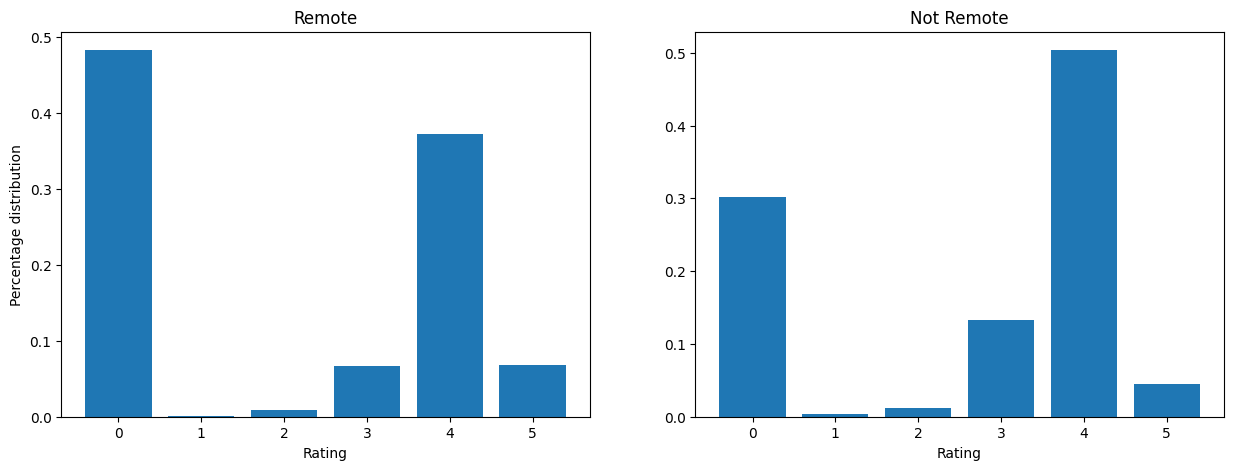

In [25]:
remote_distribution = (remote['rating'].map(lambda x: round(x, 0)).value_counts(normalize=True)).sort_index()
remote_distribution
# Calculate percentage distribution for not_remote dataframe
not_remote_distribution = (not_remote['rating'].map(lambda x: round(x, 0)).value_counts(normalize=True)).sort_index()

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.bar(remote_distribution.index, remote_distribution.values)
ax1.set_title('Remote')
ax2.set_title("Not Remote")
ax1.set_xlabel('Rating')
ax2.set_xlabel('Rating')
ax1.set_ylabel('Percentage distribution')
ax2.bar(not_remote_distribution.index, not_remote_distribution.values)

It is difficult to evaluate the result, because there are much more NaN values in the remote dataset. We can see that more people voted in the not remote dataset and that most people who voted in both datasets gave the rating 4. The average and median rating is higher in the not remote dataset.

In [26]:
remote.salary.value_counts()

salary
$132,000 - $192,000 a year    171
$110,000 - $150,000 a year     94
$90,000 - $120,000 a year      93
$109,000 - $159,000 a year     82
$120,000 - $150,000 a year     82
                             ... 
$39,519 - $82,505 a year        1
$22,000 - $42,000 a year        1
$45 - $65 an hour               1
$188,000 - $272,000 a year      1
$80 - $120 an hour              1
Name: count, Length: 612, dtype: int64

1. We have to make a few assumptions about the distribution. If a range is given then we calculate the mean. If it's a hourly salary then we multiply it by 40 * 52 since we assume the person works for 40 hours a week and a year consists of 52 weeks.  
2. We have to code this requirements since we need integers or floats to calculate the average salary

In [27]:
remote.salary.info()

<class 'pandas.core.series.Series'>
Index: 6730 entries, 2 to 58423
Series name: salary
Non-Null Count  Dtype 
--------------  ----- 
4113 non-null   object
dtypes: object(1)
memory usage: 105.2+ KB


In [28]:
not_remote.salary.info()

<class 'pandas.core.series.Series'>
Index: 51703 entries, 0 to 58432
Series name: salary
Non-Null Count  Dtype 
--------------  ----- 
13990 non-null  object
dtypes: object(1)
memory usage: 807.9+ KB


In [29]:
data = pd.Series(["$132,000 - $192,000 a year", "$110,000 - $150,000 a year"])

# Define a function to extract numbers from a string
def extract_numbers(text):
    text = str(text)
    text = text.replace(",", "")
    numbers = re.findall(r'\d+', text)
    return [int(number) if int(number) > 2000 else int(number) * 40 * 52 for number in numbers]  
    # we assume that no one has a larger hourly salary than 2000 dollars

def formatter(pd_series):
    # Apply the function to each element in the Series to get the sublists of numbers
    sublists = pd_series.apply(extract_numbers)

    # Calculate the mean for each sublist
    means = sublists.apply(lambda sublist: sum(sublist) / len(sublist) if len(sublist) > 0 else np.nan) 
    return means

remote.salary.dropna(inplace=True)
not_remote.salary.dropna(inplace=True)

salaries_remote = formatter(remote.salary)
salaries_not_remote = formatter(not_remote.salary)
print(f"Average Salaries, Remote: {salaries_remote.mean():.2f}, Not Remote: {salaries_not_remote.mean():.2f}")    

Average Salaries, Remote: 136437.22, Not Remote: 137479.49


/var/folders/fh/jv92z4dx5j9g6t17kwcrwbr40000gn/T/ipykernel_48398/2327104975.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remote.salary.dropna(inplace=True)
/var/folders/fh/jv92z4dx5j9g6t17kwcrwbr40000gn/T/ipykernel_48398/2327104975.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_remote.salary.dropna(inplace=True)


We can see that the salaries are pretty similiar and it doesn't make a big difference salary wise if you work in the office or remote

In [30]:
# Create easier csv file
#df[["title", "company", "location", "salary", "rating", "types"]].to_csv(r"data.csv")